In [1]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(grid)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
temperature <- read.csv("temperature.csv")
head(temperature)

,datetime,Vancouver,Portland,San.Francisco,Seattle,Los.Angeles,San.Diego,Las.Vegas,Phoenix,Albuquerque,⋯,Philadelphia,New.York,Montreal,Boston,Beersheba,Tel.Aviv.District,Eilat,Haifa,Nahariyya,Jerusalem
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-10-01 12:00:00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,309.1000,NA,NA,NA
2,2012-10-01 13:00:00,284.6300,282.0800,289.4800,281.8000,291.8700,291.5300,293.4100,296.6000,285.1200,⋯,285.6300,288.2200,285.8300,287.1700,307.5900,305.4700,310.5800,304.4,304.4,303.5
3,2012-10-01 14:00:00,284.6290,282.0833,289.4750,281.7972,291.8682,291.5335,293.4031,296.6085,285.1546,⋯,285.6632,288.2477,285.8346,287.1861,307.5900,304.3100,310.4958,304.4,304.4,303.5
4,2012-10-01 15:00:00,284.6270,282.0919,289.4606,281.7898,291.8628,291.5434,293.3922,296.6315,285.2340,⋯,285.7568,288.3269,285.8478,287.2317,307.3915,304.2818,310.4115,304.4,304.4,303.5
5,2012-10-01 16:00:00,284.6250,282.1005,289.4462,281.7824,291.8575,291.5532,293.3812,296.6545,285.3133,⋯,285.8504,288.4062,285.8609,287.2773,307.1452,304.2380,310.3273,304.4,304.4,303.5
6,2012-10-01 17:00:00,284.6229,282.1091,289.4319,281.7751,291.8522,291.5631,293.3702,296.6774,285.3927,⋯,285.9441,288.4855,285.8741,287.3228,306.8989,304.1942,310.2431,304.4,304.4,303.5


In [14]:
temp_clean<- temperature %>%
select(San.Francisco, Denver, New.York)%>%
filter(San.Francisco !="NA" , Denver !="NA" , New.York !="NA")%>%
mutate(San.Francisco = San.Francisco - 273.15, Denver= Denver - 273.15, New.York = New.York - 273.15)
head(temp_clean)

,San.Francisco,Denver,New.York
,<dbl>,<dbl>,<dbl>
1,16.33000,11.46000,15.07000
2,16.32499,11.45731,15.09768
3,16.31062,11.44992,15.17694
4,16.29624,11.44253,15.25620
5,16.28187,11.43514,15.33547
6,16.26749,11.42775,15.41473


In [19]:
mean <- temp_clean %>%
summarize(mean_s =mean(San.Francisco),
          mean_d =mean(Denver), 
          mean_n =mean(New.York),
         sd_s=sd(San.Francisco),
         sd_d=sd(Denver),
         sd_n=sd(New.York))
mean

mean_s,mean_d,mean_n,sd_s,sd_d,sd_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.00582,9.73918,12.25041,5.332862,10.72452,10.22093


In [20]:
nrow(temp_clean)

[1] 44460

In [24]:
temp_s <- temp_clean %>%
select(San.Francisco)
temp_d <- temp_clean %>%
select(Denver)
temp_n <- temp_clean %>%
select(New.York)

In [81]:
set.seed(1)
sample_s <- temp_s %>%
rep_sample_n(size=400)
sample_d <- temp_d %>%
rep_sample_n(size=400)
sample_n <- temp_n %>%
rep_sample_n(size=400)

resampled_s <- sample_s %>%
rep_sample_n(size=400, reps=3000, replace= TRUE)
resampled_d <- sample_d %>%
rep_sample_n(size=400, reps=3000, replace= TRUE)
resampled_n <- sample_n %>%
rep_sample_n(size=400, reps=3000, replace= TRUE)
head(resampled_s)
head(resampled_d)
head(resampled_n)

replicate,San.Francisco
<int>,<dbl>
1,26.89000
1,22.46000
1,14.51673
1,15.78000
1,9.27000
1,14.41833


replicate,Denver
<int>,<dbl>
1,-10.9700
1,23.8465
1,-3.8300
1,13.1200
1,20.1100
1,2.1100


replicate,New.York
<int>,<dbl>
1,12.960
1,14.600
1,12.815
1,12.210
1,6.800
1,8.630


In [102]:
distribution_s<- resampled_s %>%
group_by(replicate)%>%
summarize(mean_s2=mean(San.Francisco), 
          sd_s2=sd(San.Francisco))

bmean_s<-mean(distribution_s$mean_s2)

ci_s <- 
    distribution_s %>% 
    summarize(ci_lower = quantile(mean_s2, 0.05),
              ci_upper = quantile(mean_s2, 0.95))

head(distribution_s)
bmean_s
ci_s

distribution_d<- resampled_d %>%
group_by(replicate)%>%
summarize(mean_d2=mean(Denver), 
          sd_d2=sd(Denver))

bmean_d<-mean(distribution_d$mean_d2)

ci_d <- 
    distribution_d %>% 
    summarize(ci_lower = quantile(mean_d2, 0.05),
              ci_upper = quantile(mean_d2, 0.95))

head(distribution_d)
bmean_d
ci_d

distribution_n<- resampled_n %>%
group_by(replicate)%>%
summarize(mean_n2=mean(New.York), 
          sd_n2=sd(New.York))

bmean_n<-mean(distribution_n$mean_n2)

ci_n <- 
    distribution_n %>% 
    summarize(ci_lower = quantile(mean_n2, 0.05),
              ci_upper = quantile(mean_n2, 0.95))

head(distribution_n)
bmean_n
ci_n

replicate,mean_s2,sd_s2
<int>,<dbl>,<dbl>
1,15.24421,5.759892
2,14.75495,5.485433
3,14.94815,5.875602
4,15.24111,5.597661
5,15.27146,5.869948
6,15.09517,5.627330


[1] 15.12464

ci_lower,ci_upper
<dbl>,<dbl>
14.66552,15.59928


replicate,mean_d2,sd_d2
<int>,<dbl>,<dbl>
1,9.899654,11.05147
2,8.664598,11.01298
3,9.853495,11.12577
4,9.559844,10.87194
5,10.399084,10.76669
6,10.221889,11.63203


[1] 9.483279

ci_lower,ci_upper
<dbl>,<dbl>
8.579949,10.3779


replicate,mean_n2,sd_n2
<int>,<dbl>,<dbl>
1,12.16357,9.632259
2,12.52992,10.313019
3,12.62012,10.007345
4,12.34829,9.486665
5,12.65940,10.236943
6,12.72682,10.045941


[1] 12.25669

ci_lower,ci_upper
<dbl>,<dbl>
11.43978,13.06248


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



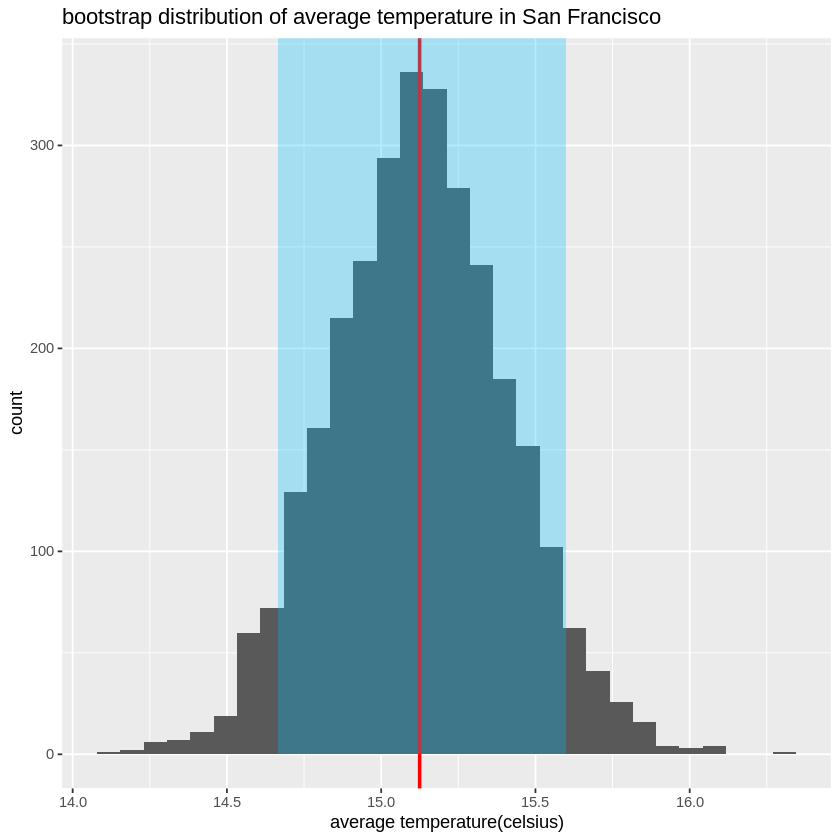

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



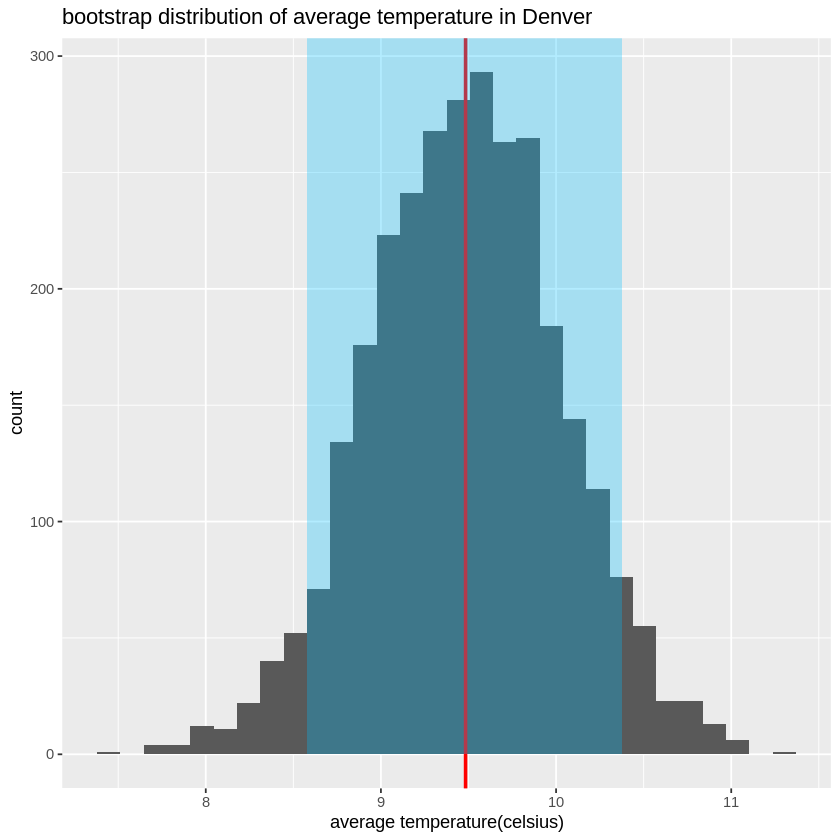

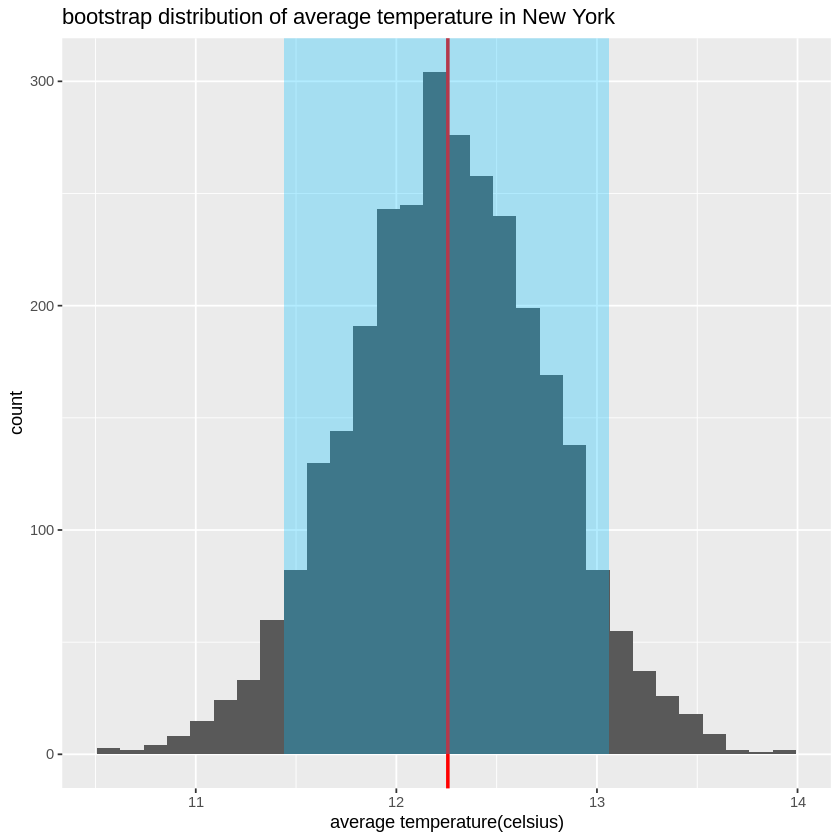

In [104]:
s_plot<- distribution_s %>%
ggplot()+
geom_histogram(aes(x= mean_s2))+
ggtitle("bootstrap distribution of average temperature in San Francisco")+
xlab("average temperature(celsius)")+
geom_vline(xintercept = bmean_s,
               size = 1,
               colour = "red")+
annotate("rect", xmin = ci_s$ci_lower, xmax = ci_s$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)
s_plot

d_plot<- distribution_d %>%
ggplot()+
geom_histogram(aes(x= mean_d2))+
ggtitle("bootstrap distribution of average temperature in Denver")+
xlab("average temperature(celsius)") +
geom_vline(xintercept = bmean_d,
               size = 1,
               colour = "red")+
annotate("rect", xmin = ci_d$ci_lower, xmax = ci_d$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)
d_plot

n_plot<- distribution_n %>%
ggplot()+
geom_histogram(aes(x= mean_n2))+
ggtitle("bootstrap distribution of average temperature in New York")+
xlab("average temperature(celsius)") +
geom_vline(xintercept = bmean_n,
               size = 1,
               colour = "red")+
annotate("rect", xmin = ci_n$ci_lower, xmax = ci_n$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)
n_plot